# Multivariate Linear Regression
The dataset has the squared meters of the house and the number of bathrooms, while the third column represents the price of the houses.
The problem here is the different scale of the features. The problem can be solved by **feature scaling**.

## Load data

In [10]:
import numpy as np
data = np.loadtxt('data/ex1data2.txt', delimiter=',')

print(data.shape)

(47, 3)


In [11]:
x = data[:, :2]
y = data[:, -1]

# from n-dimensional vector to m x 1 matrix
y = np.reshape(y, (y.shape[0], 1))

m = x.shape[0]
print("Training examples: {}".format(m))

n = x.shape[1]
print("Features: {}".format(n))

print("10 examples: \n", x[:10, :])

Training examples: 47
Features: 2
10 examples: 
 [[2.104e+03 3.000e+00]
 [1.600e+03 3.000e+00]
 [2.400e+03 3.000e+00]
 [1.416e+03 2.000e+00]
 [3.000e+03 4.000e+00]
 [1.985e+03 4.000e+00]
 [1.534e+03 3.000e+00]
 [1.427e+03 3.000e+00]
 [1.380e+03 3.000e+00]
 [1.494e+03 3.000e+00]]


## Features normalization
From all the features do the following
* Subtract the mean value
* Didive by the std deviation

In [12]:
def feature_normalize(x):
    x_norm = x
    
    mu = np.zeros((1, x.shape[1]))
    sigma = np.zeros((1, x.shape[1]))
    
    mu = np.mean(x, axis = 0) # mean value
    sigma = np.std(x, axis = 0) # std deviation value
    
    for i in range(x.shape[1]):
        x_norm[:,i] = (x[:,i] - mu[i])/sigma[i]
        
    return x_norm, mu, sigma

In [13]:
x_norm, mu, sigma = feature_normalize(x)
print("10 normalized examples: \n", x_norm[:10, :])
print("Mean value: {}".format(mu))
print("Standard deviation value: {}".format(sigma))

10 normalized examples: 
 [[ 0.13141542 -0.22609337]
 [-0.5096407  -0.22609337]
 [ 0.5079087  -0.22609337]
 [-0.74367706 -1.5543919 ]
 [ 1.27107075  1.10220517]
 [-0.01994505  1.10220517]
 [-0.59358852 -0.22609337]
 [-0.72968575 -0.22609337]
 [-0.78946678 -0.22609337]
 [-0.64446599 -0.22609337]]
Mean value: [2000.68085106    3.17021277]
Standard deviation value: [7.86202619e+02 7.52842809e-01]


## Add a column for dealing with all the parameters
$h_{\theta}(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2$

In [14]:
x_norm = np.concatenate([np.ones((m,1)), x_norm], axis = 1) # Add the column of ones to the data examples (for $\theta_0$) 

print(x_norm.shape)

(47, 3)


## Introduce functions to compute cost and gradient descent

In [15]:
def gradient_descent(x, y, theta, alpha = 0.1, iterations = 1500):
    costs = []
    for i in range(0, iterations):
        theta = theta - (alpha / x.shape[0]) * (x.T).dot(x.dot(theta) - y)
        costs.append(calculate_cost(x, y, theta))
    return theta, costs

def calculate_cost(x, y, theta = [[0],[0],[0]]):
    h = x.dot(theta)
    return 1/(2 * x.shape[0]) * np.sum(np.square(h - y))

## Running gradient descent

In [16]:
alpha = 0.1
num_iters = 500

theta = np.zeros((3, 1))
theta, cost_history = gradient_descent(x_norm, y, theta, alpha, num_iters)

theta_no_norm = np.zeros((3, 1))
x = np.concatenate([np.ones((m,1)), x], axis = 1)# Add column of ones to non normalized dataset
theta_no_norm, cost_history_no_norm = gradient_descent(x, y, theta_no_norm, alpha, num_iters)

print("Non normalized theta: \n", theta_no_norm)
print("Normalized theta: \n", theta)

Non normalized theta: 
 [[340412.65957447]
 [109447.79645983]
 [ -6578.35484435]]
Normalized theta: 
 [[340412.65957447]
 [109447.79645983]
 [ -6578.35484435]]


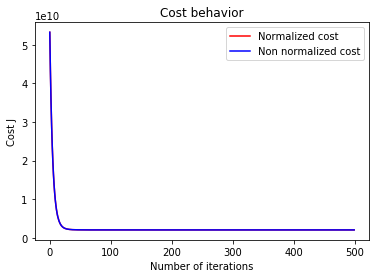

In [17]:
from matplotlib import pyplot as plt

# Plot the convergence graph
plt.plot([i for i in range(num_iters)], cost_history, '-r', label = 'Normalized cost')
plt.plot([i for i in range(num_iters)], cost_history_no_norm, '-b', label = 'Non normalized cost')
plt.xlabel('Number of iterations') # Set the x−axis label
plt.ylabel('Cost J') # Set the y−axis label 
plt.title('Cost behavior')
plt.legend()
#plt.show()

Do the following next:
* Modify the learning rate to a smaller number (.001)
* Overshoot the minimum using a bigger learnin rate (1)
* As starting point, use np.array([1,2,3]) for theta 

In [18]:
theta

array([[340412.65957447],
       [109447.79645983],
       [ -6578.35484435]])